<a href="https://colab.research.google.com/github/conopuss/sales-customer-behaviour-analysis/blob/main/Week2_Irmak_Sabuncu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded1 = files.upload()
uploaded2 = files.upload()
uploaded3 = files.upload()

Saving customer_info.csv to customer_info.csv


Saving product_info.csv to product_info.csv


Saving sales_data.csv to sales_data.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Load the Data
• Load all three CSVs into separate Pandas DataFrames

In [ ]:
customer_df = pd.read_csv('customer_info.csv')
product_df = pd.read_csv('product_info.csv')
sales_df = pd.read_csv('sales_data.csv')

In [ ]:
for name, df in [("sales", sales_df), ("product", product_df), ("customer", customer_df)]:
  print(name, df.shape)
  print(df.columns)
  print(df.head(3))


sales (3000, 10)
Index(['order_id', 'customer_id', 'product_id', 'quantity', 'unit_price',
       'order_date', 'delivery_status', 'payment_method', 'region',
       'discount_applied'],
      dtype='object')
  order_id customer_id product_id quantity  unit_price  order_date  \
0  O966977      C00397      P0022        3       39.25  06-07-2025   
1  O696648      C00236      P0023        5       18.92  06-07-2025   
2  O202644      C00492      P0011        1       29.68  07-07-2025   

  delivery_status payment_method   region  discount_applied  
0       Delivered         PayPal  Central              0.00  
1         DELAYED    credit card    North              0.00  
2       delivered  Bank Transfer    North              0.15  
product (30, 6)
Index(['product_id', 'product_name', 'category', 'launch_date', 'base_price',
       'supplier_code'],
      dtype='object')
  product_id         product_name  category launch_date  base_price  \
0      P0001   Storage Product 39   Storage    11-

In [ ]:
sales_df.head(5)

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
0,O966977,C00397,P0022,3,39.25,06-07-2025,Delivered,PayPal,Central,0.00
1,O696648,C00236,P0023,5,18.92,06-07-2025,DELAYED,credit card,North,0.00
2,O202644,C00492,P0011,1,29.68,07-07-2025,delivered,Bank Transfer,North,0.15
3,O501803,C00031,P0003,1,32.76,08-07-2025,Cancelled,Credit Card,Central,0.20
4,O322242,C00495,P0016,1,47.62,08-07-2025,DELAYED,Credit Card,West,0.20


# 2. Clean the Data
Clean each DataFrame individually before merging:                                             
• Standardise text formatting using .str.strip(), .str.lower() or .str.title():

In [ ]:
sales_df['delivery_status'] = sales_df['delivery_status'].str.strip()
sales_df['delivery_status'] = sales_df['delivery_status'].str.lower()
sales_df['delivery_status'] = sales_df['delivery_status'].str.title()

In [ ]:
sales_df['delivery_status'].value_counts()

,count
delivery_status,
Delivered,1231
Delayed,1173
Cancelled,591
Delrd,1
Delyd,1


In [ ]:
sales_df['delivery_status'] = sales_df['delivery_status'].str.replace('Delrd','Delivered')

In [ ]:
sales_df['delivery_status'] = sales_df['delivery_status'].str.replace('Delyd','Delayed')

In [ ]:
sales_df['delivery_status'].value_counts()

,count
delivery_status,
Delivered,1232
Delayed,1174
Cancelled,591


In [ ]:
sales_df['payment_method'].value_counts()

,count
payment_method,
Bank Transfer,780
PayPal,763
Credit Card,735
credit card,718
bank transfr,1


In [ ]:
sales_df['payment_method'] = sales_df['payment_method'].str.strip()
sales_df['payment_method'] = sales_df['payment_method'].str.lower()
sales_df['payment_method'] = sales_df['payment_method'].str.title()

In [ ]:
sales_df['payment_method'] = sales_df['payment_method'].str.replace('Bank Transfr','Bank Transfer')

In [ ]:
sales_df['payment_method'].value_counts()

,count
payment_method,
Credit Card,1453
Bank Transfer,781
Paypal,763


In [ ]:
sales_df['region'].value_counts()

,count
region,
North,605
Central,603
East,602
South,596
West,593
nrth,1


In [ ]:
sales_df['region'] = sales_df['region'].str.strip()
sales_df['region'] = sales_df['region'].replace('nrth','North')

In [ ]:
sales_df['region'].value_counts()

,count
region,
North,606
Central,603
East,602
South,596
West,593


In [ ]:
product_df.head()

,product_id,product_name,category,launch_date,base_price,supplier_code
0,P0001,Storage Product 39,Storage,11-03-25,15.88,S339
1,P0002,Cleaning Product 82,Cleaning,18-08-24,34.23,S974
2,P0003,Cleaning Product 85,Cleaning,15-07-24,7.92,S745
3,P0004,Kitchen Product 82,Kitchen,19-04-25,9.13,S589
4,P0005,Personal Care Product 1,Personal Care,20-10-24,31.10,S559


In [ ]:
product_df['category'].value_counts()

,count
category,
Cleaning,12
Storage,6
Outdoors,5
Kitchen,4
Personal Care,3


In [ ]:
customer_df.head()

,customer_id,email,signup_date,gender,region,loyalty_tier
0,C00001,shaneramirez@gmail.com,26-04-25,Male,Central,Silver
1,C00002,jpeterson@bernard.com,11-08-24,Female,Central,gold
2,C00003,howardmaurice@yahoo.com,15-05-25,male,Central,gold
3,C00004,yherrera@arnold.org,14-06-25,FEMALE,Central,GOLD
4,C00005,janetwilliams@gmail.com,02-05-25,Male,West,bronze


In [ ]:
customer_df['gender'] = customer_df['gender'].str.strip()
customer_df['gender'] = customer_df['gender'].str.lower()
customer_df['gender'] = customer_df['gender'].str.title()

In [ ]:
customer_df['gender'].value_counts()

,count
gender,
Male,169
Female,158
Femle,92
Other,77


In [ ]:
customer_df['gender'] = customer_df['gender'].str.replace('Femle','Female')

In [ ]:
customer_df['gender'].value_counts()

,count
gender,
Female,250
Male,169
Other,77


In [ ]:
customer_df['region'].value_counts()

,count
region,
East,103
North,101
West,100
South,99
Central,94


In [ ]:
customer_df['loyalty_tier'] = customer_df['loyalty_tier'].str.strip()
customer_df['loyalty_tier'] = customer_df['loyalty_tier'].str.lower()
customer_df['loyalty_tier'] = customer_df['loyalty_tier'].str.title()



In [ ]:
customer_df['loyalty_tier'].value_counts()

,count
loyalty_tier,
Gold,263
Silver,118
Bronze,112
Gld,2
Brnze,2
Sllver,1


In [ ]:
customer_df['loyalty_tier'] = customer_df['loyalty_tier'].str.replace('Gld','Gold').str.replace('Brnze','Bronze').str.replace('Sllver','Silver')

In [ ]:
customer_df['loyalty_tier'].value_counts()

,count
loyalty_tier,
Gold,265
Silver,119
Bronze,114


• Convert date columns (order_date, signup_date, launch_date) to datetime using
pd.to_datetime()

In [ ]:
sales_df['order_date'] = pd.to_datetime(sales_df['order_date'], dayfirst=True, errors='coerce')

In [ ]:
print(sales_df['order_date'].min(),sales_df['order_date'].max())

2025-04-01 00:00:00 2025-08-25 00:00:00


In [ ]:
product_df['launch_date'] = pd.to_datetime(product_df['launch_date'],dayfirst=True, errors='coerce')


/tmp/ipython-input-62544168.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  product_df['launch_date'] = pd.to_datetime(product_df['launch_date'],dayfirst=True, errors='coerce')


In [ ]:
print(product_df['launch_date'].min(),product_df['launch_date'].max())

2024-07-15 00:00:00 2025-06-17 00:00:00


In [ ]:
customer_df['signup_date'] = pd.to_datetime(customer_df['signup_date'], dayfirst=True, errors='coerce')

/tmp/ipython-input-3541129925.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_df['signup_date'] = pd.to_datetime(customer_df['signup_date'], dayfirst=True, errors='coerce')


In [ ]:
print(customer_df['signup_date'].min(),customer_df['signup_date'].max())

2024-07-06 00:00:00 2025-07-06 00:00:00


• Handle missing values:

In [ ]:
sales_df.isnull().sum()

,0
order_id,1
customer_id,2
product_id,5
quantity,3
unit_price,1
order_date,2
delivery_status,3
payment_method,3
region,0
discount_applied,517


In [ ]:
product_df.isnull().sum()

,0
product_id,0
product_name,0
category,0
launch_date,0
base_price,0
supplier_code,0


In [ ]:
customer_df.isnull().sum()

,0
customer_id,3
email,6
signup_date,4
gender,4
region,3
loyalty_tier,2


In [ ]:
sales_df['discount_applied'] = sales_df['discount_applied'].fillna(0.0)

In [ ]:
sales_df = sales_df.dropna(subset=['customer_id','order_id','product_id','quantity','unit_price'])

In [ ]:
sales_df[['payment_method','delivery_status']] = sales_df[['payment_method','delivery_status']].fillna('Unknown')

In [ ]:
sales_df.isnull().sum()

,0
order_id,0
customer_id,0
product_id,0
quantity,0
unit_price,0
order_date,2
delivery_status,0
payment_method,0
region,0
discount_applied,0


In [ ]:
customer_df = customer_df.dropna(subset=['customer_id'])

In [ ]:
customer_df[['gender','region']] = customer_df[['gender','region']].fillna('Unknown')

/tmp/ipython-input-2117308151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df[['gender','region']] = customer_df[['gender','region']].fillna('Unknown')


In [ ]:
customer_df['loyalty_tier'] = customer_df['loyalty_tier'].fillna('None')

/tmp/ipython-input-1418593273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['loyalty_tier'] = customer_df['loyalty_tier'].fillna('None')


In [ ]:
customer_df.isna().sum()

,0
customer_id,0
email,6
signup_date,4
gender,0
region,0
loyalty_tier,0


In [ ]:
customer_df = customer_df.copy()
customer_df['email'] = customer_df['email'].astype('string').str.strip().replace('',np.nan)

• Remove duplicates:

In [ ]:
customer_df.duplicated().sum()

np.int64(0)

In [ ]:
sales_df.duplicated().sum()

np.int64(0)

In [ ]:
product_df.duplicated().sum()

np.int64(0)

• Validate numeric columns:

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2988 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2988 non-null   object        
 1   customer_id       2988 non-null   object        
 2   product_id        2988 non-null   object        
 3   quantity          2988 non-null   object        
 4   unit_price        2988 non-null   float64       
 5   order_date        2986 non-null   datetime64[ns]
 6   delivery_status   2988 non-null   object        
 7   payment_method    2988 non-null   object        
 8   region            2988 non-null   object        
 9   discount_applied  2988 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 256.8+ KB


In [ ]:
sales_df['quantity'] = pd.to_numeric(sales_df['quantity'],errors='coerce')

In [ ]:
sales_df['quantity'].unique()

array([ 3.,  5.,  1.,  2.,  4., nan])

In [ ]:
sales_df['quantity'].isna().sum()


np.int64(2)

In [ ]:
sales_df['quantity'].dropna()

,quantity
0,3.0
1,5.0
2,1.0
3,1.0
4,1.0
...,...
2995,5.0
2996,4.0
2997,1.0
2998,5.0


In [ ]:
sales_df['quantity'] = sales_df['quantity'].astype('Int64')

In [ ]:
print((sales_df['quantity']< 0).sum())

0


In [ ]:
print(sales_df['discount_applied'].min(),sales_df['discount_applied'].max())

0.0 0.2


In [ ]:
print((sales_df['unit_price'] <0).sum())

0


# 3. Merge the Data
• Merge sales_data with product_info using product_id             
• Then merge the result with customer_info using customer_id                          
• Use how='left' to preserve all sales transactions                             
• Save the merged dataset as merged_df                         
• Inspect merged_df using .info() and .head() to confirm merge success

In [ ]:
sales_df = sales_df.rename(columns={'region':'sales_region'})

In [ ]:
customer_df = customer_df.rename(columns={'region':'customer_region'})

In [ ]:
sales_product_df = pd.merge(sales_df,product_df, on='product_id',how='left')

In [ ]:
merged_df = pd.merge(sales_product_df,customer_df, on='customer_id',how='left')

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2988 entries, 0 to 2987
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2988 non-null   object        
 1   customer_id       2988 non-null   object        
 2   product_id        2988 non-null   object        
 3   quantity          2986 non-null   Int64         
 4   unit_price        2988 non-null   float64       
 5   order_date        2986 non-null   datetime64[ns]
 6   delivery_status   2988 non-null   object        
 7   payment_method    2988 non-null   object        
 8   sales_region      2988 non-null   object        
 9   discount_applied  2988 non-null   float64       
 10  product_name      2988 non-null   object        
 11  category          2988 non-null   object        
 12  launch_date       2988 non-null   datetime64[ns]
 13  base_price        2988 non-null   float64       
 14  supplier_code     2988 n

In [ ]:
merged_df.head()

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,sales_region,discount_applied,product_name,category,launch_date,base_price,supplier_code,email,signup_date,gender,customer_region,loyalty_tier
0,O966977,C00397,P0022,3,39.25,2025-07-06,Delivered,Paypal,Central,0.00,Cleaning Product 86,Cleaning,2024-10-04,19.77,S924,jacquelinemartin@mills-logan.com,2024-09-08,Female,North,Silver
1,O696648,C00236,P0023,5,18.92,2025-07-06,Delayed,Credit Card,North,0.00,Outdoors Product 32,Outdoors,2025-01-18,36.04,S907,georgeweber@morgan.com,2024-08-06,Other,North,Gold
2,O202644,C00492,P0011,1,29.68,2025-07-07,Delivered,Bank Transfer,North,0.15,Kitchen Product 53,Kitchen,2025-03-25,11.08,S645,lcook@walters-smith.com,2024-09-25,Male,Central,Gold
3,O501803,C00031,P0003,1,32.76,2025-07-08,Cancelled,Credit Card,Central,0.20,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745,smoore@gmail.com,2024-07-28,Female,Central,Gold
4,O322242,C00495,P0016,1,47.62,2025-07-08,Delayed,Credit Card,West,0.20,Cleaning Product 53,Cleaning,2025-02-20,26.71,S715,mcclainkatherine@hotmail.com,2024-09-18,Male,Central,Gold


In [ ]:

assert len(merged_df) == len(sales_df)

missing_product = merged_df['product_name'].isna().sum()


cust_cols = ['email','signup_date','gender','customer_region','loyalty_tier']
unmatched_customer = merged_df[cust_cols].isna().all(axis=1).sum()

print({
    'missing_product_rows': int(missing_product),
    'unmatched_customer_rows': int(unmatched_customer),
    'quantity_NaN': int(merged_df['quantity'].isna().sum()),
    'order_date_NaT': int(merged_df['order_date'].isna().sum()),
})

{'missing_product_rows': 0, 'unmatched_customer_rows': 24, 'quantity_NaN': 2, 'order_date_NaT': 2}


In [ ]:
# ID’leri hizala
sales_df['customer_id']   = sales_df['customer_id'].astype('string').str.strip()
customer_df['customer_id']= customer_df['customer_id'].astype('string').str.strip()
customer_df = customer_df.drop_duplicates(subset=['customer_id'])


sales_product_df = sales_df.merge(product_df, on='product_id', how='left', validate='many_to_one')
merged_df = sales_product_df.merge(customer_df, on='customer_id', how='left', validate='many_to_one')

cust_cols = ['email','signup_date','gender','customer_region','loyalty_tier']
unmatched_customer = merged_df[cust_cols].isna().all(axis=1).sum()
print('unmatched_customer_rows:', int(unmatched_customer))


unmatched_customer_rows: 24


# 4. Feature Engineering

• revenue = quantity × unit_price × (1 - discount_applied)      


In [ ]:
merged_df['revenue'] = (merged_df['quantity']* merged_df['unit_price'] * (1- merged_df['discount_applied']))

In [ ]:
merged_df['revenue'] = merged_df['revenue'].round(2)

In [ ]:
merged_df.head()

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,sales_region,discount_applied,...,category,launch_date,base_price,supplier_code,email,signup_date,gender,customer_region,loyalty_tier,revenue
0,O966977,C00397,P0022,3,39.25,2025-07-06,Delivered,Paypal,Central,0.00,...,Cleaning,2024-10-04,19.77,S924,jacquelinemartin@mills-logan.com,2024-09-08,Female,North,Silver,117.75
1,O696648,C00236,P0023,5,18.92,2025-07-06,Delayed,Credit Card,North,0.00,...,Outdoors,2025-01-18,36.04,S907,georgeweber@morgan.com,2024-08-06,Other,North,Gold,94.6
2,O202644,C00492,P0011,1,29.68,2025-07-07,Delivered,Bank Transfer,North,0.15,...,Kitchen,2025-03-25,11.08,S645,lcook@walters-smith.com,2024-09-25,Male,Central,Gold,25.23
3,O501803,C00031,P0003,1,32.76,2025-07-08,Cancelled,Credit Card,Central,0.20,...,Cleaning,2024-07-15,7.92,S745,smoore@gmail.com,2024-07-28,Female,Central,Gold,26.21
4,O322242,C00495,P0016,1,47.62,2025-07-08,Delayed,Credit Card,West,0.20,...,Cleaning,2025-02-20,26.71,S715,mcclainkatherine@hotmail.com,2024-09-18,Male,Central,Gold,38.1


• order_week = ISO week from order_date

In [ ]:
merged_df['order_week'] = merged_df['order_date'].dt.isocalendar().week

In [ ]:
merged_df.head()

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,sales_region,discount_applied,...,launch_date,base_price,supplier_code,email,signup_date,gender,customer_region,loyalty_tier,revenue,order_week
0,O966977,C00397,P0022,3,39.25,2025-07-06,Delivered,Paypal,Central,0.00,...,2024-10-04,19.77,S924,jacquelinemartin@mills-logan.com,2024-09-08,Female,North,Silver,117.75,27
1,O696648,C00236,P0023,5,18.92,2025-07-06,Delayed,Credit Card,North,0.00,...,2025-01-18,36.04,S907,georgeweber@morgan.com,2024-08-06,Other,North,Gold,94.6,27
2,O202644,C00492,P0011,1,29.68,2025-07-07,Delivered,Bank Transfer,North,0.15,...,2025-03-25,11.08,S645,lcook@walters-smith.com,2024-09-25,Male,Central,Gold,25.23,28
3,O501803,C00031,P0003,1,32.76,2025-07-08,Cancelled,Credit Card,Central,0.20,...,2024-07-15,7.92,S745,smoore@gmail.com,2024-07-28,Female,Central,Gold,26.21,28
4,O322242,C00495,P0016,1,47.62,2025-07-08,Delayed,Credit Card,West,0.20,...,2025-02-20,26.71,S715,mcclainkatherine@hotmail.com,2024-09-18,Male,Central,Gold,38.1,28


• price_band = Categorise unit price as Low (<£15), Medium (£15–30), High (>£30)

In [ ]:
import numpy as np

low  = merged_df['unit_price'] < 15
mid  = (merged_df['unit_price'] >= 15) & (merged_df['unit_price'] <= 30)
high = merged_df['unit_price'] > 30

merged_df['price_band'] = np.select([low, mid, high],
                                    ['Low','Medium','High'], default=None)


In [ ]:
merged_df.head()

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,sales_region,discount_applied,...,base_price,supplier_code,email,signup_date,gender,customer_region,loyalty_tier,revenue,order_week,price_band
0,O966977,C00397,P0022,3,39.25,2025-07-06,Delivered,Paypal,Central,0.00,...,19.77,S924,jacquelinemartin@mills-logan.com,2024-09-08,Female,North,Silver,117.75,27,High
1,O696648,C00236,P0023,5,18.92,2025-07-06,Delayed,Credit Card,North,0.00,...,36.04,S907,georgeweber@morgan.com,2024-08-06,Other,North,Gold,94.6,27,Medium
2,O202644,C00492,P0011,1,29.68,2025-07-07,Delivered,Bank Transfer,North,0.15,...,11.08,S645,lcook@walters-smith.com,2024-09-25,Male,Central,Gold,25.23,28,Medium
3,O501803,C00031,P0003,1,32.76,2025-07-08,Cancelled,Credit Card,Central,0.20,...,7.92,S745,smoore@gmail.com,2024-07-28,Female,Central,Gold,26.21,28,High
4,O322242,C00495,P0016,1,47.62,2025-07-08,Delayed,Credit Card,West,0.20,...,26.71,S715,mcclainkatherine@hotmail.com,2024-09-18,Male,Central,Gold,38.1,28,High


• days_to_order = Days between launch_date and order_date

In [ ]:
merged_df['days_to_order'] = merged_df['order_date'] - merged_df['launch_date']

In [ ]:
merged_df.head()

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,sales_region,discount_applied,...,supplier_code,email,signup_date,gender,customer_region,loyalty_tier,revenue,order_week,price_band,days_to_order
0,O966977,C00397,P0022,3,39.25,2025-07-06,Delivered,Paypal,Central,0.00,...,S924,jacquelinemartin@mills-logan.com,2024-09-08,Female,North,Silver,117.75,27,High,275 days
1,O696648,C00236,P0023,5,18.92,2025-07-06,Delayed,Credit Card,North,0.00,...,S907,georgeweber@morgan.com,2024-08-06,Other,North,Gold,94.6,27,Medium,169 days
2,O202644,C00492,P0011,1,29.68,2025-07-07,Delivered,Bank Transfer,North,0.15,...,S645,lcook@walters-smith.com,2024-09-25,Male,Central,Gold,25.23,28,Medium,104 days
3,O501803,C00031,P0003,1,32.76,2025-07-08,Cancelled,Credit Card,Central,0.20,...,S745,smoore@gmail.com,2024-07-28,Female,Central,Gold,26.21,28,High,358 days
4,O322242,C00495,P0016,1,47.62,2025-07-08,Delayed,Credit Card,West,0.20,...,S715,mcclainkatherine@hotmail.com,2024-09-18,Male,Central,Gold,38.1,28,High,138 days


• email_domain = Extract domain from email (e.g., gmail.com)

In [ ]:
import re
reg = re.compile(r'(?<=@)([^@\s]+)$')
merged_df['email_domain'] = merged_df['email'].astype(str).str.extract(reg, expand=False)

In [ ]:
merged_df.head()

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,sales_region,discount_applied,...,email,signup_date,gender,customer_region,loyalty_tier,revenue,order_week,price_band,days_to_order,email_domain
0,O966977,C00397,P0022,3,39.25,2025-07-06,Delivered,Paypal,Central,0.00,...,jacquelinemartin@mills-logan.com,2024-09-08,Female,North,Silver,117.75,27,High,275 days,mills-logan.com
1,O696648,C00236,P0023,5,18.92,2025-07-06,Delayed,Credit Card,North,0.00,...,georgeweber@morgan.com,2024-08-06,Other,North,Gold,94.6,27,Medium,169 days,morgan.com
2,O202644,C00492,P0011,1,29.68,2025-07-07,Delivered,Bank Transfer,North,0.15,...,lcook@walters-smith.com,2024-09-25,Male,Central,Gold,25.23,28,Medium,104 days,walters-smith.com
3,O501803,C00031,P0003,1,32.76,2025-07-08,Cancelled,Credit Card,Central,0.20,...,smoore@gmail.com,2024-07-28,Female,Central,Gold,26.21,28,High,358 days,gmail.com
4,O322242,C00495,P0016,1,47.62,2025-07-08,Delayed,Credit Card,West,0.20,...,mcclainkatherine@hotmail.com,2024-09-18,Male,Central,Gold,38.1,28,High,138 days,hotmail.com


• is_late = True if delivery_status is "Delayed"

In [ ]:
merged_df['is_late'] = merged_df['delivery_status'].apply(lambda x: True if x == 'Delayed' else False)

In [ ]:
merged_df.head()

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,sales_region,discount_applied,...,signup_date,gender,customer_region,loyalty_tier,revenue,order_week,price_band,days_to_order,email_domain,is_late
0,O966977,C00397,P0022,3,39.25,2025-07-06,Delivered,Paypal,Central,0.00,...,2024-09-08,Female,North,Silver,117.75,27,High,275 days,mills-logan.com,False
1,O696648,C00236,P0023,5,18.92,2025-07-06,Delayed,Credit Card,North,0.00,...,2024-08-06,Other,North,Gold,94.6,27,Medium,169 days,morgan.com,True
2,O202644,C00492,P0011,1,29.68,2025-07-07,Delivered,Bank Transfer,North,0.15,...,2024-09-25,Male,Central,Gold,25.23,28,Medium,104 days,walters-smith.com,False
3,O501803,C00031,P0003,1,32.76,2025-07-08,Cancelled,Credit Card,Central,0.20,...,2024-07-28,Female,Central,Gold,26.21,28,High,358 days,gmail.com,False
4,O322242,C00495,P0016,1,47.62,2025-07-08,Delayed,Credit Card,West,0.20,...,2024-09-18,Male,Central,Gold,38.1,28,High,138 days,hotmail.com,True


# 5. Create Summary Tables

*  Weekly revenue trends by region



In [ ]:
mask_rev_reg = merged_df['revenue'].notna() & merged_df['order_week'].notna() & merged_df['sales_region'].notna()

In [ ]:
weekly_revenue_region = merged_df.loc[mask_rev_reg].pivot_table(index='order_week',columns='sales_region', values='revenue',aggfunc='sum',  fill_value=0.0)

In [ ]:
weekly_revenue_region

sales_region,Central,East,North,South,West
order_week,,,,,
14,68.76,70.12,195.18,0.0,0.0
15,16.06,30.73,210.85,145.86,59.65
16,14.85,247.47,338.09,138.48,0.0
17,0.0,259.76,0.0,43.93,174.64
18,210.86,1328.74,1006.93,569.27,908.15
19,1655.56,1847.56,1581.07,2103.71,1529.03
20,1139.9,2051.14,1883.53,2522.04,1667.71
21,1626.75,1463.22,3012.99,3179.9,2225.31
22,2894.52,2863.39,2666.05,3301.49,3485.63


• Product category performance (revenue, quantity, discount)

In [ ]:
product_categ = (merged_df.groupby('category')[['revenue','quantity','discount_applied']]
                 .agg({'revenue':'sum','quantity':'sum','discount_applied':'mean'}).rename(columns={'discount_applied':'avg_discount'})
                 .round({'avg_discount':2})
                 )

In [ ]:
product_categ


,revenue,quantity,avg_discount
category,,,
Cleaning,93536.65,3580,0.09
Kitchen,33993.03,1229,0.08
Outdoors,40104.01,1521,0.08
Personal Care,24892.25,900,0.09
Storage,46931.4,1730,0.08


• Customer behaviour by loyalty_tier and signup_month

In [ ]:
merged_df['signup_month'] = merged_df['signup_date'].dt.to_period('M').astype(str)

In [ ]:
customer_behaviour = (merged_df.dropna(subset=['signup_month','loyalty_tier','customer_id'])
.pivot_table(index='signup_month',columns='loyalty_tier',values='customer_id',aggfunc='nunique',fill_value=0))

In [ ]:
customer_behaviour

loyalty_tier,Bronze,Gold,None,Silver
signup_month,,,,
2024-07,10,20,0,6
2024-08,10,29,0,10
2024-09,7,24,0,11
2024-10,12,25,0,12
2024-11,9,22,0,14
2024-12,10,29,0,6
2025-01,12,22,0,6
2025-02,8,22,2,11
2025-03,5,20,0,12


• Delivery performance by region and price_band

In [ ]:
delivery_performance = (
    merged_df
    .pivot_table(index=['sales_region','price_band'],
                 values='is_late', aggfunc='mean', fill_value=0)
    .rename(columns={'is_late': 'is_late %'})
    .rename_axis(index={'sales_region': 'region'})
    .round(2)
)


In [ ]:
delivery_performance

is_late %
region  price_band           
Central High             0.39
        Low              0.38
        Medium           0.39
East    High             0.41
        Low              0.42
        Medium           0.43
North   High             0.36
        Low              0.38
        Medium           0.44
South   High             0.42
        Low              0.33
        Medium           0.36
West    High             0.38
        Low              0.39
        Medium           0.35

• Preferred payment methods by loyalty_tier

In [ ]:
payment_method_by_tier = (pd.crosstab(merged_df['loyalty_tier'],merged_df['payment_method'],normalize='index' ).mul(100).round(1)
.round(2).rename(columns={'Bank Transfer': 'Bank Transfer %', 'Credit Card':'Credit Card %','Paypal':'Paypal %','Unknown':'Unknown %'}))


In [ ]:
payment_method_by_tier

payment_method,Bank Transfer %,Credit Card %,Paypal %,Unknown %
loyalty_tier,,,,
Bronze,28.5,45.4,26.1,0.0
Gold,24.1,50.2,25.5,0.1
None,0.0,66.7,33.3,0.0
Silver,29.0,46.2,24.6,0.2


# 6. Visual Exploration

* Line plot - weekly revenue trends by region



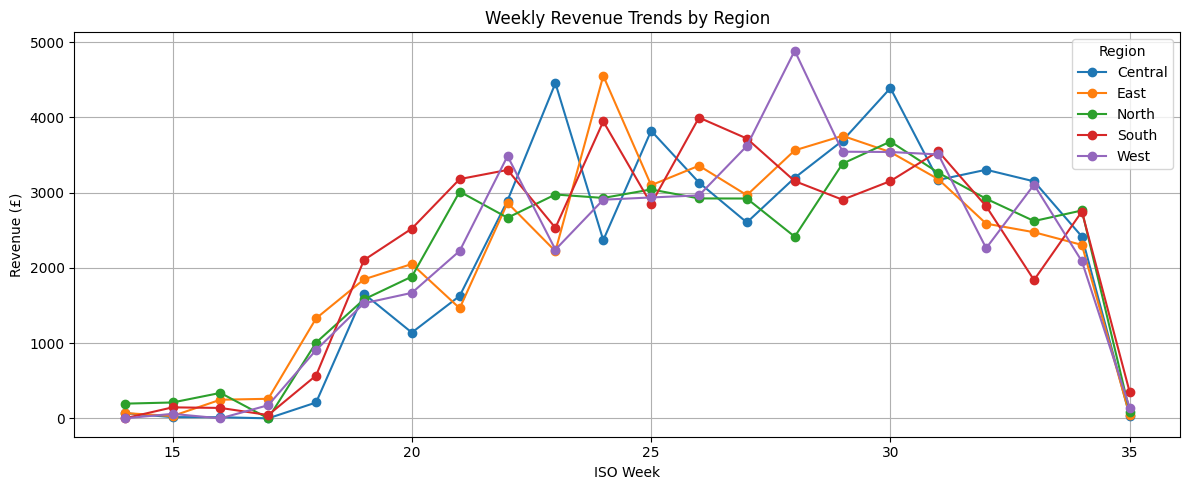

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
for col in weekly_revenue_region.columns:
    plt.plot(weekly_revenue_region.index, weekly_revenue_region[col], marker='o', label=col)
plt.title('Weekly Revenue Trends by Region')
plt.xlabel('ISO Week')
plt.ylabel('Revenue (£)')
plt.grid(True)
plt.legend(title='Region')
plt.tight_layout()
plt.show()


* Bar chart - top 5 categories by revenue




In [ ]:

top_5_cat = product_categ.sort_values(by='revenue', ascending=False).head(5)


<BarContainer object of 5 artists>

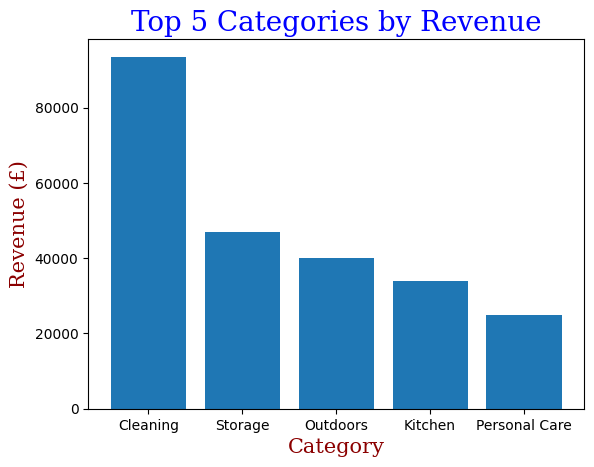

In [ ]:
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title('Top 5 Categories by Revenue',fontdict=font1)
plt.ylabel('Revenue (£)', fontdict=font2)
plt.xlabel('Category',fontdict=font2)

plt.bar(top_5_cat.index, top_5_cat['revenue'])



* Boxplot - quantity vs discount across categories




In [ ]:
qu_dis_categ = merged_df[['category','quantity','discount_applied']]


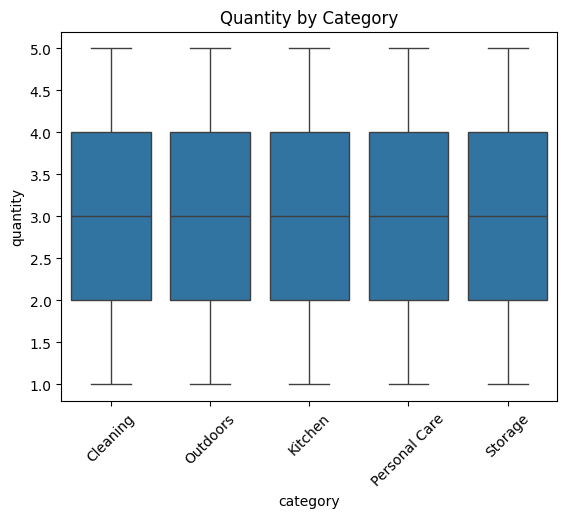

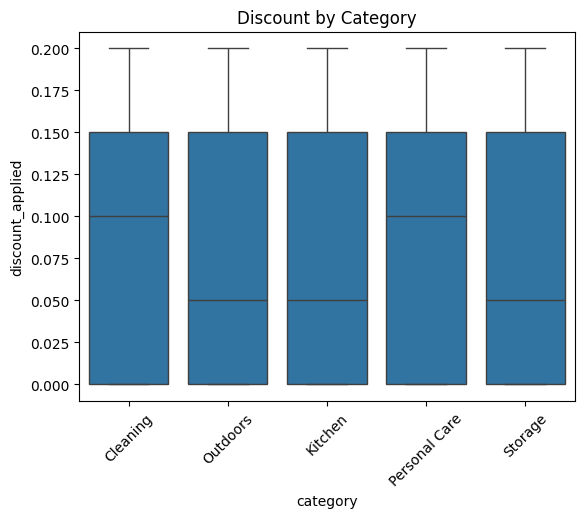

In [ ]:
import seaborn as sns
sns.boxplot(x='category', y='quantity', data=qu_dis_categ)
plt.title('Quantity by Category')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x='category', y='discount_applied', data=qu_dis_categ)
plt.title('Discount by Category')
plt.xticks(rotation=45)
plt.show()



* . Heatmap - correlation between revenue, discount, and quantity




In [ ]:
corr_rev_dis_quan = merged_df[['revenue','discount_applied','quantity']]
corr = corr_rev_dis_quan.corr(method='pearson')

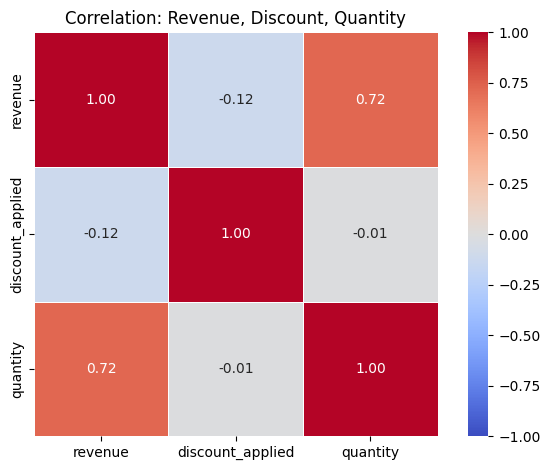

In [ ]:
sns.heatmap(corr, annot=True, fmt='.2f', vmin=-1, vmax=1, center=0, square=True, linewidths=0.5, cmap='coolwarm')
plt.title('Correlation: Revenue, Discount, Quantity')
plt.tight_layout()
plt.show()



*  Countplot - orders by loyalty tier (with hue = region)



In [ ]:
orders = merged_df[['order_id','loyalty_tier','sales_region']]

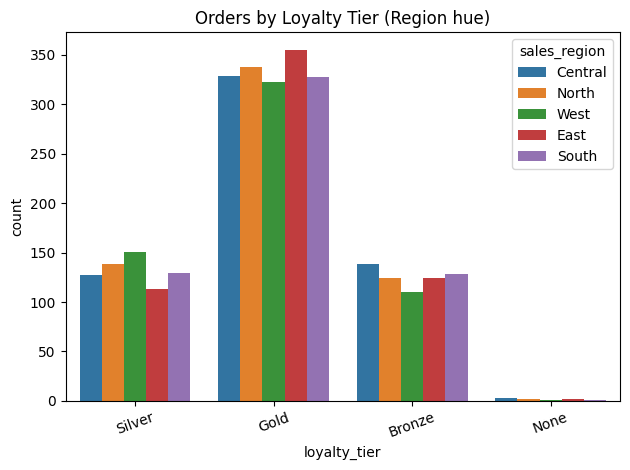

In [ ]:
sns.countplot(x='loyalty_tier', hue='sales_region', data=orders)
plt.title('Orders by Loyalty Tier (Region hue)')
plt.xticks(rotation=20)
plt.tight_layout()



*  Stacked bar or pie - delivery status by price band



In [ ]:
status_by_price = pd.crosstab(merged_df['price_band'], merged_df['delivery_status'])

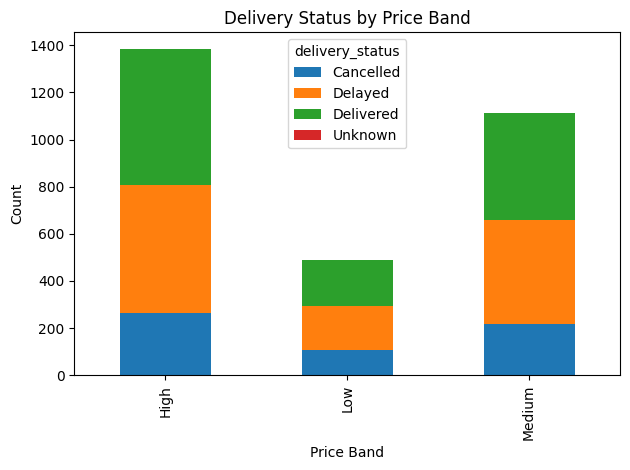

In [ ]:
status_by_price.plot(kind='bar', stacked=True)
plt.title('Delivery Status by Price Band')
plt.xlabel('Price Band'); plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 7. Business Questions to Answer


* Which product categories drive the most revenue, and in which regions?



In [ ]:
mask_cat = merged_df['revenue'].notna() & merged_df['category'].notna() & merged_df['sales_region'].notna()
category_rev_reg = merged_df.loc[mask_cat].pivot_table(index='category',columns='sales_region', values='revenue',aggfunc='sum',  fill_value=0.0)
category_rev_reg

sales_region,Central,East,North,South,West
category,,,,,
Cleaning,18018.88,19911.31,18766.15,18887.42,17952.89
Kitchen,6519.01,6695.85,6283.42,7761.37,6733.38
Outdoors,7931.88,7121.39,7848.22,9327.43,7875.09
Personal Care,5616.13,4616.21,5207.55,4239.02,5213.34
Storage,9358.5,9498.09,8715.0,9345.4,10014.41


In [ ]:
category_rev_reg.stack().idxmax()

('Cleaning', 'East')



*  Do discounts lead to more items sold?



In [ ]:
merged_df[['quantity','discount_applied']].corr(method='pearson')

,quantity,discount_applied
quantity,1.000000,-0.011143
discount_applied,-0.011143,1.000000




* Which loyalty tier generates the most value?



In [ ]:
loyalty_most_value = merged_df.groupby('loyalty_tier')['revenue'].sum()

In [ ]:
loyalty_most_value

,revenue
loyalty_tier,
Bronze,49053.7
Gold,136278.48
None,767.29
Silver,52032.52


In [ ]:
loyalty_most_value.idxmax()

'Gold'



*  Are certain regions struggling with delivery delays?



In [ ]:
region_delivery = pd.crosstab(merged_df['delivery_status'], merged_df['sales_region'])

In [ ]:
region_delivery

sales_region,Central,East,North,South,West
delivery_status,,,,,
Cancelled,125,98,117,116,133
Delayed,235,251,237,229,218
Delivered,240,250,250,248,238
Unknown,1,1,1,0,0


In [ ]:
region_delivery.idxmax()

,0
sales_region,
Central,Delivered
East,Delayed
North,Delivered
South,Delivered
West,Delivered




*  Do customer signup patterns influence purchasing activity?



In [ ]:
new_customers = customer_behaviour.sum(axis=1).rename('new_customers')

cohort_revenue = (merged_df
    .groupby('signup_month')['revenue']
    .sum()
    .rename('cohort_revenue'))

cohort_df = pd.concat([new_customers, cohort_revenue], axis=1).dropna()
corr_val = cohort_df['new_customers'].corr(cohort_df['cohort_revenue'], method='pearson')
print('corr(new_customers, cohort_revenue) =', corr_val)


corr(new_customers, cohort_revenue) = 0.9789868029001177
